# Analyzing IMDB Movies Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('IMDB-Movie-Data.csv')

In [4]:
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


# Check Missing Values In The Dataset

<Axes: >

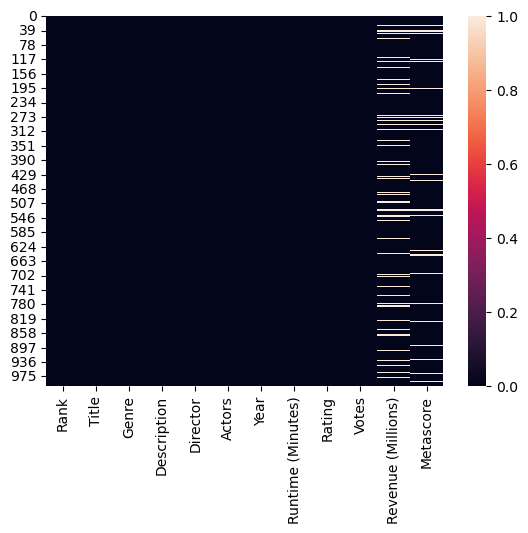

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

# Drop All The  Missing Values

In [6]:
df = df.dropna(axis = 0)

<Axes: >

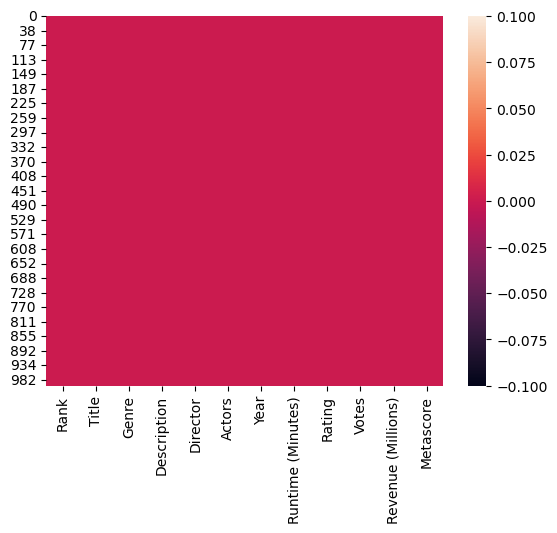

In [9]:
sns.heatmap(df.isnull())

# Check For Duplicate Data

In [15]:
df.duplicated().any()

False

# Get Overall Statistics About The DataFrame

In [16]:
df.describe(include = 'all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838,838,838,838,838,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
unique,NaN,837,189,838,524,834,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,485.247017,NaN,NaN,NaN,NaN,NaN,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,NaN,NaN,NaN,NaN,NaN,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,NaN,NaN,NaN,NaN,NaN,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,NaN,NaN,NaN,NaN,NaN,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,NaN,NaN,NaN,NaN,NaN,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000


# Display Title of The Movie Having Runtime Greater Than or equal to 180 Minutes

In [19]:
df[df['Runtime (Minutes)']>=180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

# In Which Year There Was The Highest Average Voting?

In [8]:
df.groupby('Year')['Votes'].mean().sort_values(ascending = False).head(1)

Year
2012    290861.483871
Name: Votes, dtype: float64

<Axes: xlabel='Year', ylabel='Votes'>

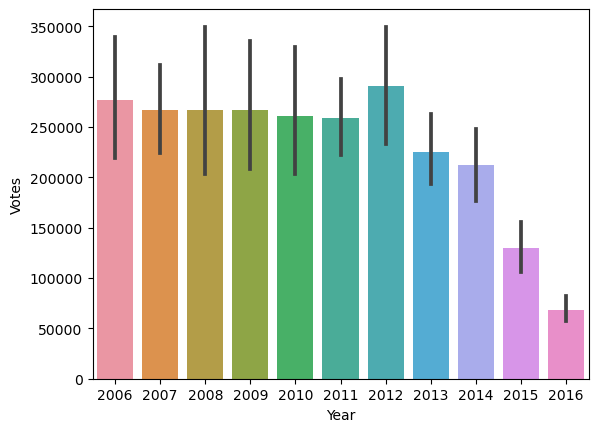

In [14]:
sns.barplot(x = 'Year',y = 'Votes',data = df)

# In Which Year There Was The Highest Average Revenue?

In [11]:
df.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending = False).head(1)

Year
2009    115.742
Name: Revenue (Millions), dtype: float64

<Axes: xlabel='Year', ylabel='Revenue (Millions)'>

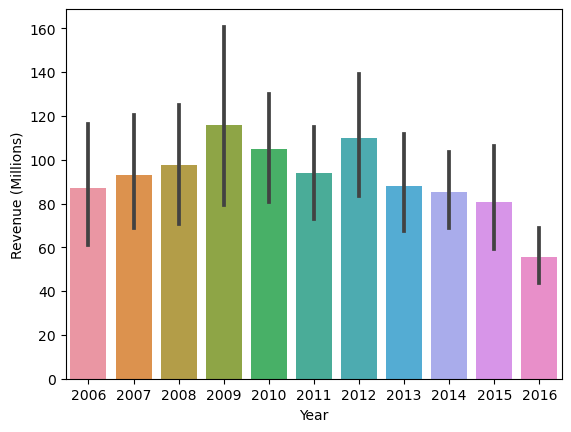

In [15]:
sns.barplot(x = 'Year',y = 'Revenue (Millions)',data = df)

#  Find The Average Rating For Each Director

In [13]:
df.groupby('Director')['Rating'].mean()

Director
Aamir Khan             8.50
Abdellatif Kechiche    7.80
Adam McKay             7.00
Adam Shankman          6.30
Adam Wingard           5.90
                       ... 
Xavier Dolan           8.10
Yimou Zhang            6.10
Yorgos Lanthimos       7.20
Zack Snyder            7.04
Zackary Adler          5.10
Name: Rating, Length: 524, dtype: float64

# Display Top 10 Lengthy Movies Title and Runtime

In [29]:
indexi = df['Runtime (Minutes)'].sort_values(ascending = False).index

In [30]:
df.loc[indexi][['Title','Runtime (Minutes)']].head(10)

,Title,Runtime (Minutes)
88,The Hateful Eight,187
82,The Wolf of Wall Street,180
311,La vie d'Adèle,180
267,Cloud Atlas,172
430,3 Idiots,170
75,Pirates of the Caribbean: At World's End,169
36,Interstellar,169
271,The Hobbit: An Unexpected Journey,169
425,The Curious Case of Benjamin Button,166
126,Transformers: Age of Extinction,165


# Display Number of Movies Per Year

In [32]:
df.groupby('Year')['Title'].count()

Year
2006     41
2007     44
2008     48
2009     45
2010     57
2011     57
2012     62
2013     84
2014     93
2015    109
2016    198
Name: Title, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

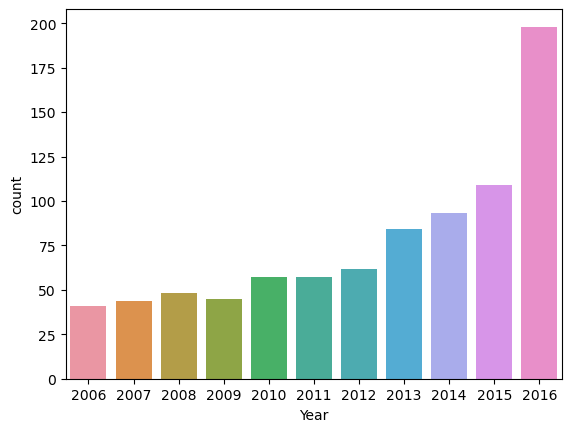

In [34]:
sns.countplot(x = 'Year',data = df)

# Find Most Popular Movie Title (Highest Revenue)

In [41]:
a = df['Revenue (Millions)'].max()
df[df['Revenue (Millions)'] == a]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0


# Display Top 10 Highest Rated Movie Titles And its Directors

In [54]:
a = df.sort_values(by = 'Rating',ascending = False)
a[['Title','Director']].head(10)

,Title,Director
54,The Dark Knight,Christopher Nolan
80,Inception,Christopher Nolan
36,Interstellar,Christopher Nolan
249,The Intouchables,Olivier Nakache
96,Kimi no na wa,Makoto Shinkai
124,The Dark Knight Rises,Christopher Nolan
991,Taare Zameen Par,Aamir Khan
133,Whiplash,Damien Chazelle
99,The Departed,Martin Scorsese
476,The Lives of Others,Florian Henckel von Donnersmarck


#  Display Top 10 Highest Revenue Movie Titles

<Axes: xlabel='Revenue (Millions)', ylabel='Title'>

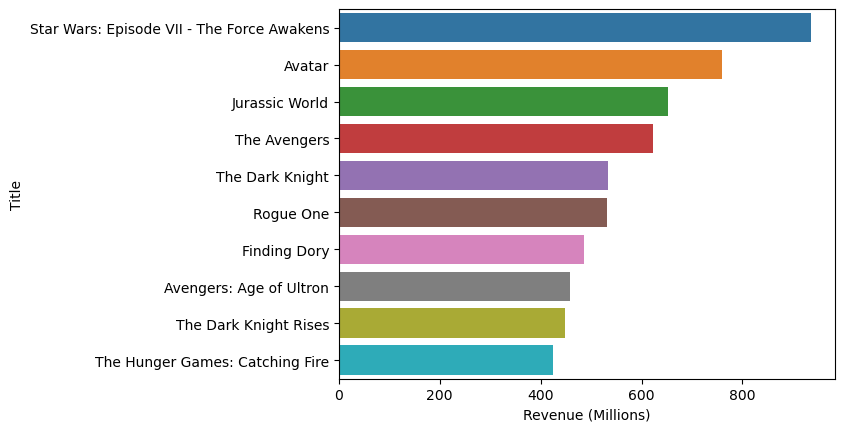

In [62]:
a = df.sort_values(by =  'Revenue (Millions)',ascending = False)
b = a[['Title','Revenue (Millions)']].head(10)
sns.barplot(y = 'Title',x = 'Revenue (Millions)',data = b)

# Find Average Rating of Movies Year Wise

In [57]:
df.groupby('Year')['Rating'].mean()

Year
2006    7.143902
2007    7.140909
2008    6.708333
2009    6.911111
2010    6.894737
2011    6.945614
2012    6.933871
2013    6.832143
2014    6.822581
2015    6.674312
2016    6.644444
Name: Rating, dtype: float64

<Axes: xlabel='Year', ylabel='Rating'>

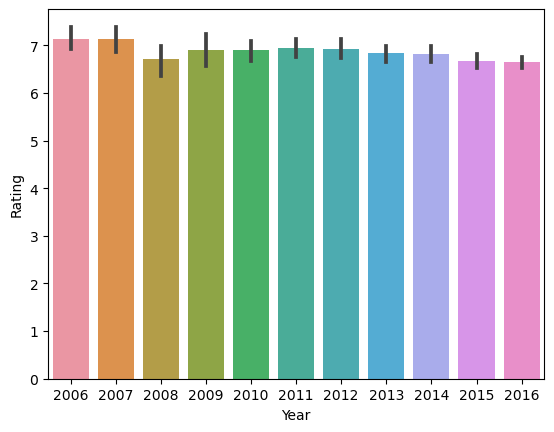

In [58]:
sns.barplot(x = 'Year',y = 'Rating',data = df)

# Does Rating Affect The Revenue?

<Axes: xlabel='Revenue (Millions)', ylabel='Rating'>

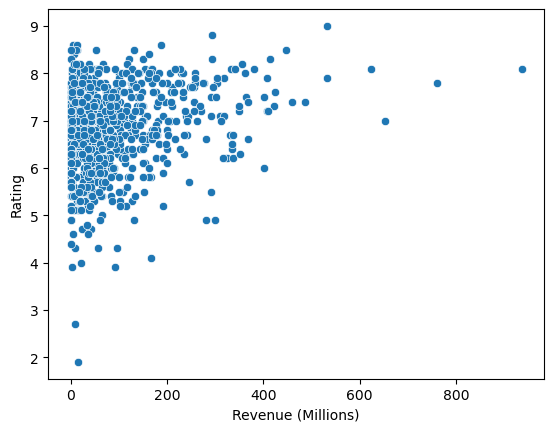

In [63]:
sns.scatterplot(y = 'Rating',x = 'Revenue (Millions)',data = df)

# Classify Movies Based on Ratings [Excellent, Good, and Average]

In [67]:
def ratings(rating):
    if rating >= 7.0:
        return 'Excellent'
    elif rating >= 6.0:
        return 'Good'
    else:
        return 'Average'
    
df['Category'] = df['Rating'].apply(rating)

C:\Users\goela\AppData\Local\Temp\ipykernel_7460\1519291870.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = df['Rating'].apply(rating)


In [68]:
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Good
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0,Average
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0,Good
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,Average
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,Good


 # Count Number of Action Movies

In [72]:
len(df[df['Genre'].str.contains('action',case = False)])

277

# Find Unique Values From Genre 

In [73]:
df['Genre'].unique()

array(['Action,Adventure,Sci-Fi', 'Adventure,Mystery,Sci-Fi',
       'Horror,Thriller', 'Animation,Comedy,Family',
       'Action,Adventure,Fantasy', 'Comedy,Drama,Music',
       'Action,Adventure,Biography', 'Adventure,Drama,Romance',
       'Adventure,Family,Fantasy', 'Biography,Drama,History',
       'Animation,Adventure,Comedy', 'Action,Comedy,Drama',
       'Action,Thriller', 'Biography,Drama', 'Drama,Mystery,Sci-Fi',
       'Adventure,Drama,Thriller', 'Drama', 'Comedy',
       'Action,Adventure,Drama', 'Drama,Thriller',
       'Action,Adventure,Comedy', 'Action,Horror,Sci-Fi',
       'Adventure,Drama,Sci-Fi', 'Action,Adventure,Western',
       'Comedy,Drama', 'Action,Crime,Thriller', 'Action,Crime,Drama',
       'Adventure,Drama,History', 'Crime,Horror,Thriller',
       'Drama,Romance', 'Comedy,Drama,Romance', 'Crime,Drama,Mystery',
       'Drama,Romance,Thriller', 'Drama,History,Thriller',
       'Action,Drama,Thriller', 'Action,Drama,Romance', 'Drama,Fantasy',
       'Action,Sc